In [1]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

# ngarko datasetet
train_df = pd.read_csv(r"C:\Users\dijar\Desktop\Detyra Linkplus\AGNEWS_TRAIN.csv")
test_df  = pd.read_csv(r"C:\Users\dijar\Desktop\Detyra Linkplus\AGNEWS_TEST.csv")

# bashko title + description
train_df["text"] = train_df["Title"] + " " + train_df["Description"]
test_df["text"]  = test_df["Title"] + " " + test_df["Description"]

# lista e stopwords
stopwords = {"the","a","an","is","are","was","were","to","of","in","and","on","at","for","with"}

def clean_text_basic(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords]
    return " ".join(tokens)

# pastro datasetet
train_df["clean_text"] = train_df["text"].apply(clean_text_basic)
test_df["clean_text"]  = test_df["text"].apply(clean_text_basic)

### 1. Exploratory Analysis (me train set)
print("Numri i mostrave per kategori (train):")
print(train_df["Class Index"].value_counts())

# fjalët më të shpeshta (marrim një mostër të train set për shpejtësi)
all_words = " ".join(train_df["clean_text"].sample(2000, random_state=42)).split()
print("Fjalet më të shpeshta:", Counter(all_words).most_common(15))

### 2. Model Training
X_train = train_df["clean_text"]
y_train = train_df["Class Index"]

X_test = test_df["clean_text"]
y_test = test_df["Class Index"]

# vektorizim TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# trajnim model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# parashikime
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Raporti i klasifikimit:\n", classification_report(y_test, y_pred))

### 3. Prediction Script
def predict_category(text):
    clean = clean_text_basic(text)
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    categories = {1:"World", 2:"Sports", 3:"Business", 4:"Sci/Tech"}
    return categories[pred]

# testim me disa fjali
print(predict_category("NASA announces new mission to Mars"))
print(predict_category("Barcelona wins the Champions League"))
print(predict_category("Stock markets fall after economic report"))
print(predict_category("New AI technology is transforming education"))


Numri i mostrave per kategori (train):
Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64
Fjalet më të shpeshta: [('39s', 504), ('that', 480), ('as', 436), ('its', 349), ('new', 347), ('said', 330), ('has', 327), ('it', 320), ('us', 314), ('by', 314), ('reuters', 305), ('from', 290), ('his', 262), ('will', 262), ('ap', 261)]
Accuracy: 0.9040789473684211
Raporti i klasifikimit:
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.97      0.96      1900
           3       0.87      0.87      0.87      1900
           4       0.88      0.88      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

Sci/Tech
Sports
Business
Sci/Tech


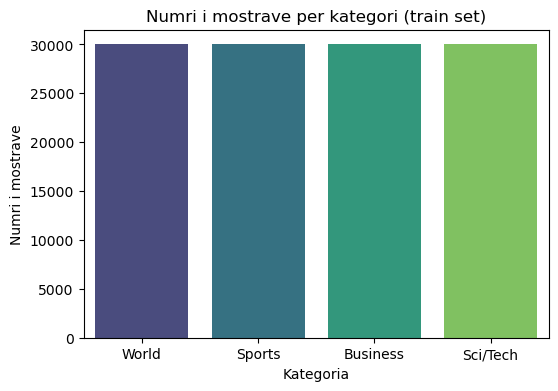

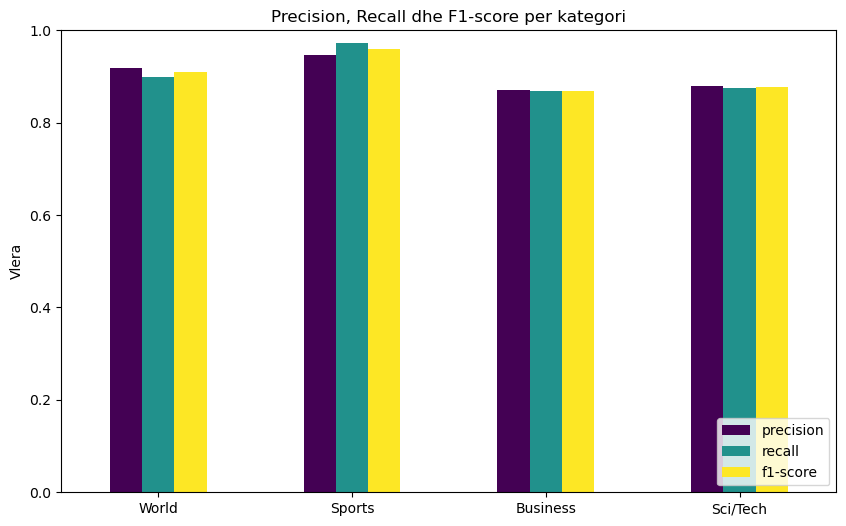

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# =======================
# 1. Shpërndarja e kategorive (train set)
# =======================
cat_counts = train_df["Class Index"].value_counts().sort_index()
categories = {1:"World", 2:"Sports", 3:"Business", 4:"Sci/Tech"}

plt.figure(figsize=(6,4))
sns.barplot(
    x=[categories[c] for c in cat_counts.index],
    y=cat_counts.values,
    hue=[categories[c] for c in cat_counts.index],  # shtohet hue
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("Numri i mostrave per kategori (train set)")
plt.xlabel("Kategoria")
plt.ylabel("Numri i mostrave")
plt.show()

# =======================
# 2. Precision/Recall/F1 per kategori
# =======================
report = classification_report(y_test, y_pred, output_dict=True)

metrics_df = pd.DataFrame(report).T
metrics_df = metrics_df.iloc[:4, :3]  # veç 4 kategoritë, 3 metrikat

metrics_df.plot(kind="bar", figsize=(10,6), colormap="viridis")
plt.title("Precision, Recall dhe F1-score per kategori")
plt.xticks(ticks=range(4), labels=[categories[i] for i in range(1,5)], rotation=0)
plt.ylabel("Vlera")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()
